In [9]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

df = pd.read_excel('./data4/시도별 전출입 인구수.xlsx', fillna=0, header=0)
df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

col_years = list(map(str, range(2010, 2018)))
df = df_seoul.loc[['충청남도', '경상북도', '강원도', '부산광역시'], col_years]
df = df.transpose()

print(type(df))

df.head()

<class 'pandas.core.frame.DataFrame'>


전입지,충청남도,경상북도,강원도,부산광역시
2010,24522,16042,22736,17418
2011,24723,15818,23624,18816
2012,22269,15191,22332,16135
2013,21486,14420,20601,16153
2014,21473,14456,21173,17320


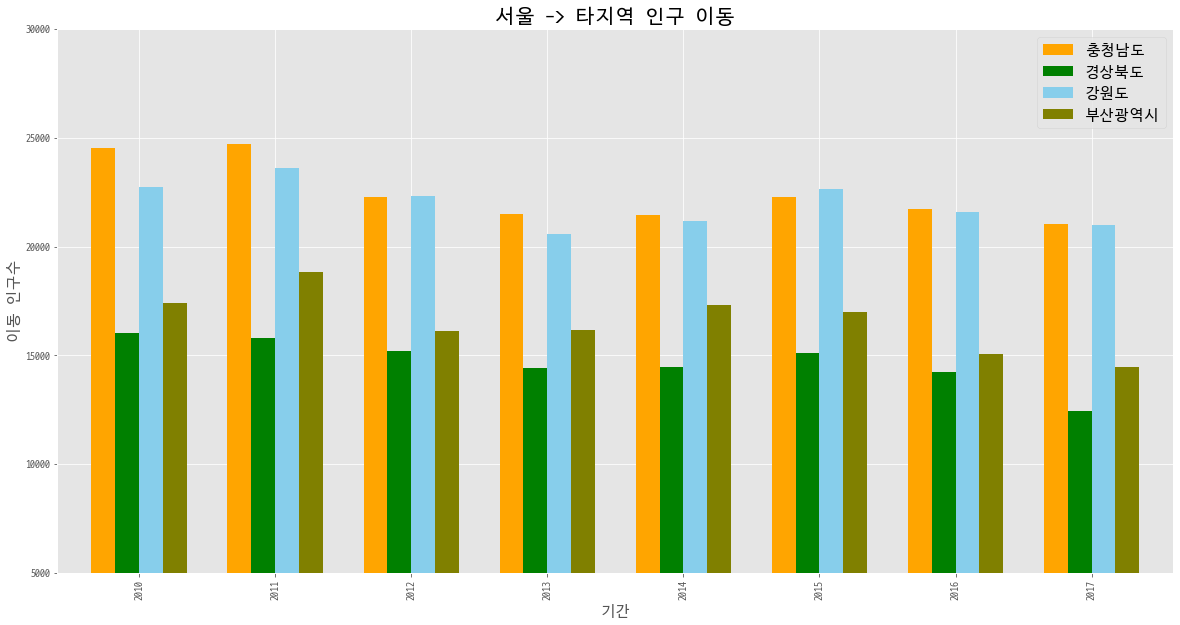

In [11]:
plt.style.use('ggplot')

# 마이너스 폰트 깨짐 현상 수정
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
path = '/usr/share/fonts/truetype/naver-d2coding/D2Coding-Ver1.3.2-20180524-all.ttc'
font_name = fm.FontProperties(fname=path, size=15).get_name()
plt.rc('font', family=font_name)

df.index = df.index.map(int)
df.plot(kind='bar', figsize=(20, 10), width=0.7, color=['orange', 'green', 'skyblue', 'olive'])

plt.title('서울 -> 타지역 인구 이동', size=20)
plt.ylabel('이동 인구수', size=15)
plt.xlabel('기간', size=15)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()